# Understanding Descriptive Statistics

Import the necessary libraries here:

In [5]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here
def random_dice(num_rolls):
    rolls = [random.randint(1, 6) for _ in range(num_rolls)]
    df = pd.DataFrame({'Roll': range(1, num_rolls + 1), 'Result': rolls})
    return df

dice_rolls_df = random_dice(10)

dice_rolls_df.head(10)

,Roll,Result
0,1,6
1,2,4
2,3,3
3,4,6
4,5,3
5,6,2
6,7,4
7,8,3
8,9,4
9,10,1


#### 2.- Plot the results sorted by value.

In [4]:
# your code here
dice_rolls_df.head(10)

,Roll,Result
0,1,6
1,2,4
2,3,3
3,4,6
4,5,3
5,6,2
6,7,4
7,8,3
8,9,4
9,10,1


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

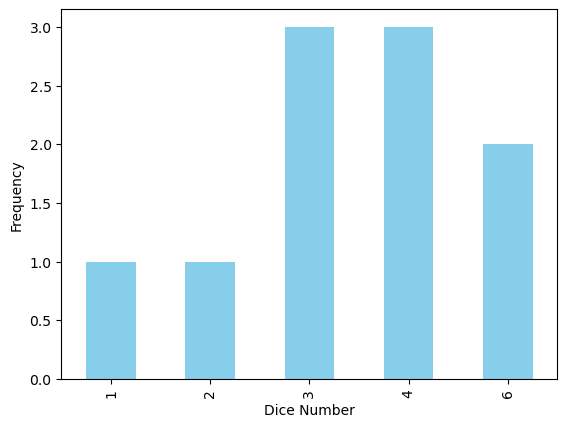

In [7]:
frequency_distribution = dice_rolls_df['Result'].value_counts().sort_index()

frequency_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Dice Number')
plt.ylabel('Frequency')
plt.show()

In [ ]:
"""
your comments here
As expected roll 3 or 4 are the most probable in a D6 dice since they are the midle numbers

"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here

def mean_value(data):
    total_sum = sum(data)
    total_count = len(data)
    if total_count == 0:
        return 0  
    else:
        return total_sum / total_count


dice_results = dice_rolls_df['Result'].tolist()
mean = mean_value(dice_results)
mean

3.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
# your code here
frequency_distribution = dice_rolls_df['Result'].value_counts().sort_index()

def calculate_mean_from_frequency_distribution(frequency_distribution):
    total_sum = 0
    total_count = 0

    for value, frequency in frequency_distribution.items():
        total_sum += value * frequency
        total_count += frequency

    if total_count == 0:
        return None
    else:
        mean = total_sum / total_count
        return mean

mean_from_frequency = calculate_mean_from_frequency_distribution(frequency_distribution)
mean_from_frequency

3.6

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [15]:
# your code here

def calculate_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    if n % 2 != 0:
        median = sorted_data[n // 2]
    else:
        mid = n // 2
        median = (sorted_data[mid - 1] + sorted_data[mid]) / 2

    return median

median = calculate_median(dice_results)
print("Median:", median)

Median: 3.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [17]:
# your code here

def calculate_quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)


    if n % 2 != 0:
        q2 = calculate_median(sorted_data)
        lower_half = sorted_data[0:n // 2]
        upper_half = sorted_data[n // 2 + 1:]
    else:
        mid = n // 2
        q2 = (sorted_data[mid - 1] + sorted_data[mid]) / 2
        lower_half = sorted_data[0:mid]
        upper_half = sorted_data[mid:]

    q1 = calculate_median(lower_half)
    q3 = calculate_median(upper_half)

    return q1, q2, q3

q1, q2, q3 = calculate_quartiles(dice_results)
print("Q1:", q1)
print("Q2:", q2)
print("Q3:", q3)

(Q1): 3
(Q2): 3.5
(Q3): 4


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [19]:
# your code here
roll_df = pd.read_csv("roll_the_dice_hundred.csv")
roll_df.head(10)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


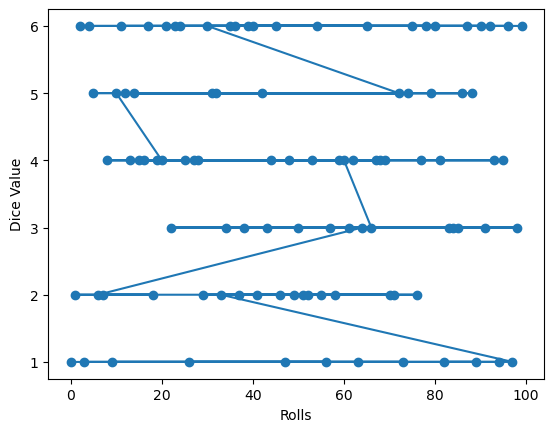

In [21]:
sorted_values = roll_df['value'].sort_values()

plt.plot(sorted_values, marker='o', linestyle='-')
plt.xlabel('Rolls')
plt.ylabel('Dice Value')
plt.show()

In [ ]:
"""
your comments here
In the plot I can see that numbers 1, 2, 3 and 5 have less rolls than number 4 and 6 who I think they got more numbers of rolls. They have more "dots"
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [26]:
# your code here

mean_three = mean_value(roll_df['value'])
mean_three

3.74

#### 3.- Now, calculate the frequency distribution.


In [31]:
# your code here
frequency_distribution_two = roll_df['value'].value_counts().sort_index()
frequency_distribution_two

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

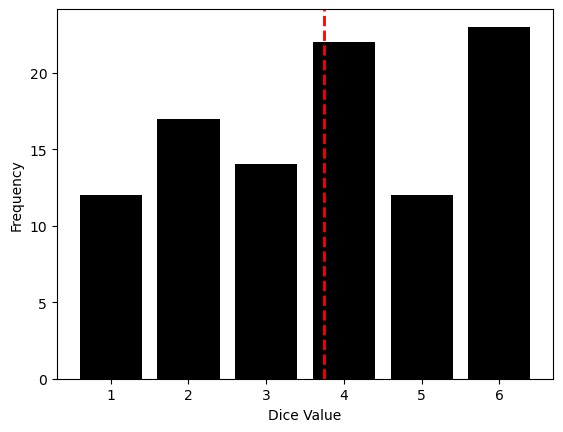

In [36]:
plt.bar(frequency_distribution_two.index, frequency_distribution_two.values, color='black', label='Frequency Distribution')
plt.axvline(mean_three, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
"""
your comments here
(i did some research online to learn how to use the mean line in the same plot)
I can say the most rolled numbers are 4 and 6 and more than half of the rolls are from 4 to 6
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [37]:
# your code here
roll_1000_df = pd.read_csv("roll_the_dice_thousand.csv")
roll_1000_df.sample(10)

,Unnamed: 0,roll,value
636,636,636,5
620,620,620,5
32,32,32,3
373,373,373,3
36,36,36,1
38,38,38,6
987,987,987,1
886,886,886,5
539,539,539,2
469,469,469,5


In [38]:
frequency_distribution_three = roll_1000_df['value'].value_counts().sort_index()
frequency_distribution_three

1    175
2    167
3    175
4    168
5    149
6    166
Name: value, dtype: int64

In [39]:
mean_four = mean_value(roll_1000_df['value'])
mean_four

3.447

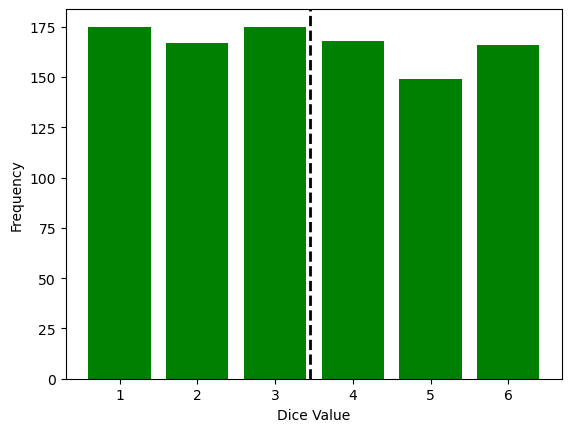

In [43]:
plt.bar(frequency_distribution_three.index, frequency_distribution_three.values, color='green')
plt.axvline(mean_four, color='black', linestyle='dashed', linewidth=2)
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
"""
your comments here
Since we have a larger sample the mean is going near the 3,5 the average of a d6 dice, so its normal that the numbers are getting more stable whit less difference between them
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [46]:
# your code here
ages_df = pd.read_csv("ages_population.csv")
ages_df.head(5)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [47]:
freq_dist = ages_df['observation'].value_counts().sort_index()


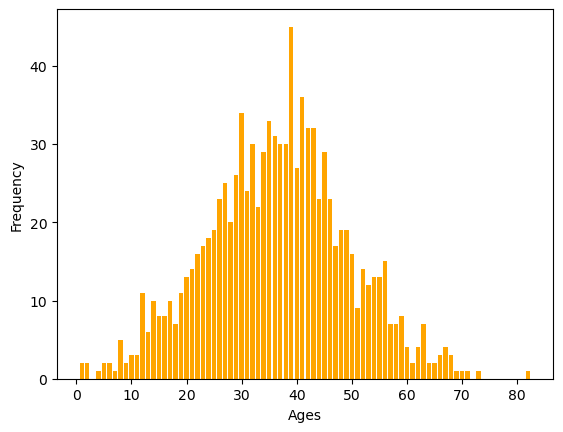

In [48]:
plt.bar(freq_dist.index, freq_dist.values, color='orange')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

My guess is the mean should be between 30 to 40, and the std dev between 10 and 20


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [49]:
# your code here

standard_deviation = ages_df['observation'].std()
standard_deviation

12.816499625976762

In [51]:
mean_ages = mean_value(ages_df['observation'])
mean_ages

36.56

In [ ]:
"""
your comments here

I did get the ranges right, but i guess it was to much long range, anyway I think it is right from what i see at the plot
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [52]:
# your code here
ages_df_2 = pd.read_csv("ages_population2.csv")
ages_df_2.head(5)

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


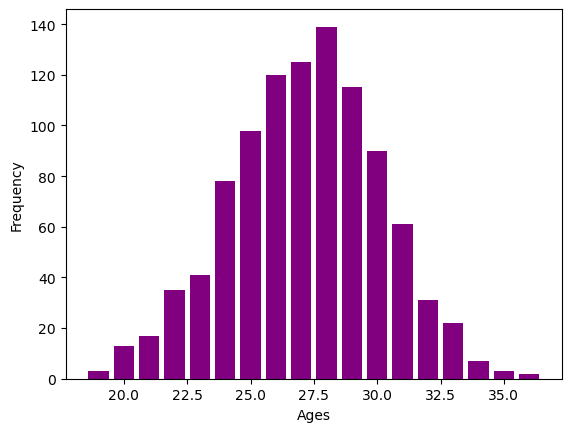

In [53]:
freq_dist_2 = ages_df_2['observation'].value_counts().sort_index()
plt.bar(freq_dist_2.index, freq_dist_2.values, color='purple')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
the range of these sample is alot shorter, only focus on people between 20's and 30's, but it still shows a identical distribution
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [54]:
# your code here
mean_ages_2 = mean_value(ages_df_2['observation'])
mean_ages_2

27.155

In [55]:
standard_deviation_2 = ages_df_2['observation'].std()
standard_deviation_2

2.969813932689186

In [ ]:
"""
your comments here

since the sample values are alot shorter than the 1st DF, the STD DEV is a small number so the values are closer to the mean than the first DF
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [56]:
# your code here
ages_df_3 = pd.read_csv("ages_population3.csv")
ages_df_3.head(5)

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


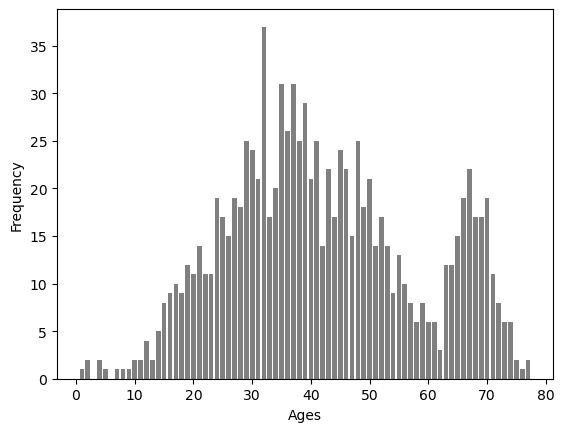

In [57]:
freq_dist_3 = ages_df_3['observation'].value_counts().sort_index()
plt.bar(freq_dist_3.index, freq_dist_3.values, color='grey')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [58]:
# your code here
mean_ages_3 = mean_value(ages_df_3['observation'])
mean_ages_3

41.989

In [59]:
standard_deviation_3 = ages_df_3['observation'].std()
standard_deviation_3

16.144705959865934

In [ ]:
"""
your comments here 
identical sample range whit ages between 1 and 70's, but the result are more spread than the first DF, bigger STD DEV and mean

"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [64]:
# your code here

q1, q2, q3 = calculate_quartiles(ages_df['observation'])

print("Q1:", q1)
print("Q2/Median:", q2)
print("Q3:", q3)

Q1: 28.0
Q2/Median: 37.0
Q3: 45.0


In [65]:
difference = mean_ages - q2
difference

-0.4399999999999977

In [ ]:
"""
your comments here
the diference between mean and median is only 0,44
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [67]:
# your code here

p10 = np.percentile(ages_df, 10)
p90 = np.percentile(ages_df, 90)
p95 = np.percentile(ages_df, 95)

print("10th percentile:", p10)
print("90th percentile:", p90)
print("95th percentile:", p95)

10th percentile: 20.0
90th percentile: 53.0
95th percentile: 58.0


In [ ]:
"""
your comments here

only 10% have less than 20 years and 10% have more than 53 years, so between 20 and 53 we have 80% of our population
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""